In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# hack to import files from parent directory
import os
import sys
upper_dir = os.path.abspath(os.path.join('..'))
if upper_dir not in sys.path:
    sys.path.append(upper_dir)
    

# packages existing in parent directory
from Feedforward.feedforward import Feedforward
import utils.ntk_lib as ntk_lib

In [2]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
width = 160000
output_d = 1
bias=True

In [4]:
n = 10000
d = 3
uniform_hypersphere_data = np.random.randn(n,d)
uniform_hypersphere_data = uniform_hypersphere_data/np.linalg.norm(uniform_hypersphere_data, axis=1).reshape(-1,1)
uniform_hypersphere_data = torch.tensor(uniform_hypersphere_data)

In [5]:
from math import pi
def gaussianAct(x):
    return torch.exp(-x**2/2)/(2*pi)**0.5


In [ ]:
fig, axs = plt.subplots(1, 3)

depth = 2
acts = [torch.nn.functional.relu, torch.tanh, gaussianAct]
act_name = ['ReLU', 'Tanh', 'Gaussian']
data = uniform_hypersphere_data

stop_index = 2000

result = [[],[],[]]

for k, act in enumerate(acts):
    # initialize network
    input_d = data.shape[-1]
    net = Feedforward(width, input_d, output_d, act, depth, bias)
    net = net.double()

    # Compute NTK
    ntk_data = ntk_lib.ntk(net, data)

    # Compute eigenvalues for the NTK
    eigs = np.linalg.eigvalsh(ntk_data)
    eigs_reversed_sorted = np.sort(eigs)[::-1]
    result[k] = eigs_reversed_sorted


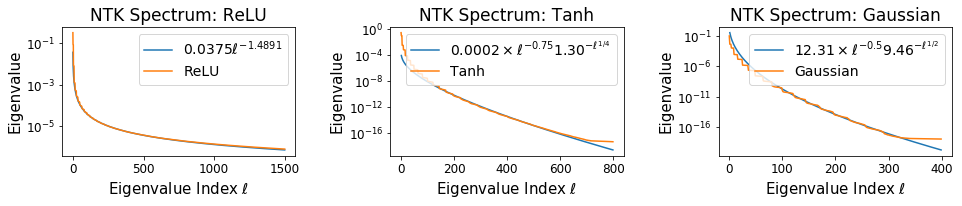

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np
start = 100
stop = 500
stop_index = 1500
list_n = np.array(range(start, stop))
n = (list_n).shape[0]
X = np.zeros((n,1))
X[:,0] = np.log(list_n+1)
# X[:,1] = np.ones(n)
y_s = np.log(result[0][start:stop]/data.shape[0])
reg = LinearRegression().fit(X, y_s)
reg.score(X, y_s)

fig, axs = plt.subplots(1,3)
axs[0].semilogy(np.array(range(0,stop_index)), np.exp(reg.predict(np.log((np.array(range(0,stop_index))
                                                                          +1).reshape(-1,1)))))
axs[0].semilogy(result[0][:stop_index]/data.shape[0], label=act_name[0])
axs[0].legend(["${:.4f}\ell^{{{:.4f}}}$".format(np.exp(reg.intercept_),reg.coef_[0]),f"ReLU"],fontsize=14)
axs[0].set_title('NTK Spectrum: ReLU', fontsize=17)
axs[0].tick_params(axis='both', labelsize=12)
axs[0].set_ylabel('Eigenvalue', fontsize=15)
axs[0].set_xlabel('Eigenvalue Index $\ell$', fontsize=15)
fig.set_size_inches(14, 3.5)
fig.tight_layout(pad=3.0)

start = 100
stop = 600
stop_index = 800
list_n = np.array(range(start, stop))
n = (list_n).shape[0]
X = np.zeros((n,1))
X[:,0] = (list_n+1)**0.5**(1/(data.shape[1]-1))
# X[:,1] = np.ones(n)
y_s = np.log(result[1][start:stop]/data.shape[0]*(list_n+1)**(1.5/2))
reg = LinearRegression().fit(X, y_s)
reg.score(X, y_s)

axs[1].semilogy(np.array(range(1,stop_index)), 1/np.array(range(2,stop_index+1))**(1.5/2)*np.exp(reg.predict((((np.array(range(1,stop_index))+1)**0.5**(1/(data.shape[1]-1))).reshape(-1,1)))))
axs[1].semilogy(result[1][:stop_index]/data.shape[0], label=act_name[0])
# axs[1].legend(["${:.4f}e^{{{:.2f}n^{{1/4}}}}$".format(np.exp(reg.intercept_),reg.coef_[0]),f"Tanh activation"],fontsize=15)
axs[1].legend(["${:.4f}\\times\ell^{{-0.75}}{:.2f}^{{-\ell^{{1/4}}}}$".format(np.exp(reg.intercept_),np.exp(-reg.coef_[0])),f"Tanh"],fontsize=14)
axs[1].set_title('NTK Spectrum: Tanh', fontsize=17)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].set_ylabel('Eigenvalue', fontsize=15)
axs[1].set_xlabel('Eigenvalue Index $\ell$', fontsize=15)
fig.set_size_inches(14, 3.5)
fig.tight_layout(pad=3.0)


start = 100
stop = 300
stop_index = 400
list_n = np.array(range(start, stop))
n = (list_n).shape[0]
X = np.zeros((n,1))
X[:,0] = (list_n+1)**(1/(data.shape[1]-1))
# X[:,1] = np.ones(n)
y_s = np.log(result[2][start:stop]/data.shape[0]*(list_n+1)**(1/2))
reg = LinearRegression().fit(X, y_s)
reg.score(X, y_s)

axs[2].semilogy(np.array(range(1,stop_index)), 1/np.array(range(2,stop_index+1))**(1/2)*np.exp(reg.predict((((np.array(range(1,stop_index))+1)**(1/(data.shape[1]-1))).reshape(-1,1)))))
axs[2].semilogy(result[2][:stop_index]/data.shape[0], label=act_name[0])
axs[2].legend(["${:.2f}\\times\ell^{{-0.5}}{:.2f}^{{-\ell^{{1/2}}}}$".format(np.exp(reg.intercept_),np.exp(-reg.coef_[0])),f"Gaussian"],fontsize=14)
axs[2].set_title('NTK Spectrum: Gaussian', fontsize=17)
axs[2].tick_params(axis='both', labelsize=12)
axs[2].set_ylabel('Eigenvalue', fontsize=15)
axs[2].set_xlabel('Eigenvalue Index $\ell$', fontsize=15)
fig.set_size_inches(14, 6)
fig.tight_layout(pad=3.0)
